=> **Web Crawling** é a técnica usada para navegar pela web automaticamente, seguindo links e coletando informações sobre páginas e seus conteúdos. Motores de busca, como o Google, usam web crawlers para indexar sites e criar um banco de dados de páginas da internet.

=> **Web Scraping**, por outro lado, envolve extrair dados específicos de páginas web. Ele pega informações de um site e as transforma em um formato utilizável, como uma planilha ou banco de dados. É comumente usado para coletar preços de produtos, analisar tendências ou monitorar conteúdo.

=> **BeautifulSoup**: É uma biblioteca poderosa para analisar documentos HTML e XML. Ela facilita a navegação e busca de elementos dentro do código da página, tornando a extração de dados muito mais simples. Com ela, é possível localizar tags, atributos e informações específicas sem precisar escrever código complexo de parsing manual.

=> **Newspaper3k**: É uma biblioteca voltada para a extração de artigos de notícias. Ela não apenas faz o parsing de HTML, mas também analisa automaticamente textos de artigos, obtém metadados como autores e datas de publicação, e até mesmo resume conteúdos. Isso a torna uma opção ideal para quem deseja coletar e processar notícias de forma eficiente.

=> **Stemming** é o processo de reduzir palavras ao seu radical ou raiz, eliminando sufixos e permitindo um melhor processamento de linguagem natural.  
O SnowballStemmer é baseado no algoritmo Snowball, que é uma versão aprimorada do Porter Stemmer. Ele suporta múltiplos idiomas e é mais eficiente em remover sufixos das palavras sem perder tanto significado.

=> **spacy** é uma das bibliotecas mais populares para Processamento de Linguagem Natural (NLP) em Python. Funcionalidades do spaCy:

Tokenização: Divide textos em palavras, frases ou outras unidades linguísticas.

Lematização: Reduz palavras à sua forma base (como "correr" para "correr").

Reconhecimento de Entidades Nomeadas (NER): Identifica entidades como nomes, locais e valores numéricos no texto.

Análise Sintática: Permite entender a estrutura gramatical de uma sentença.

Vetores de palavras (Word Embeddings): Trabalha com modelos pré-treinados para entender similaridade semântica.

Suporte para múltiplos idiomas: Vem com modelos prontos para diversas línguas.

=> **en_core_web_sm** é um dos modelos pré-treinados disponíveis no spaCy para Processamento de Linguagem Natural (NLP). Ele contém informações linguísticas baseadas em textos em inglês e pode ser usado para análise de texto.

Aqui estão alguns detalhes sobre esse modelo:

Idioma: Inglês

Tamanho: Pequeno (sm significa "small")

Inclui:

Tokenização

Análise sintática

Lematização

Reconhecimento de entidades nomeadas (NER)

Vetores de palavras (mas com qualidade limitada)

Apesar de ser um modelo leve e rápido, ele tem menos precisão comparado a modelos maiores, como en_core_web_md (médio) ou en_core_web_lg (grande), que possuem embeddings mais ricos.

In [ ]:
import requests
from bs4 import BeautifulSoup

def scrape_post_titles(url):

    response = requests.get(url)
    html = response.content

    soup = BeautifulSoup(html, "html.parser")
    titles = soup.select("h3 a")
    return [title.get_text() for title in titles]


root = "https://www.r-bloggers.com/"

pages = [root] + [f"{root}page/{i}" for i in range(2, 11)]

all_titles = []

for page in pages:
    titles = scrape_post_titles(page)
    all_titles.extend(titles)


all_titles

['Fast Grouped Counts and Means in R',
 'Spatial machine learning with R: caret, tidymodels, and mlr3',
 'vowels: Phonetics cloze quiz about Cardinal vowels',
 'flags: Fun with Flags',
 'Explained vs.\xa0Predictive Power: R², Adjusted R², and Beyond',
 'surveydown: An Open-Source, Markdown-Based Platform for Interactive and Reproducible Surveys workshop',
 'sumdiff: Sum Minus Difference',
 'Announcing… schematic',
 'How the DSGE sausage is made',
 'rOpenSci News Digest, April 2025',
 'proximal sampler',
 '[R] How to create errorbars with overlaid points using ggplot',
 'World Economic Outlook by @ellis2013nz',
 '‘Bayesian’ optimization of hyperparameters in a R machine learning model using the bayesianrvfl package',
 'Function Generators vs Partial Application in R',
 'Bollinger Bands: Invesco CoinShares ETF\xa0',
 'Shinyscholar – a template for producing reproducible analytic apps in R workshop',
 'My Journey Learning R as a Humanities Undergrad',
 'A lightweight interface to scikit-l

In [27]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\belch\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
import re
from tqdm.auto import tqdm
from nltk.stem import SnowballStemmer

stopwords = list(nltk.corpus.stopwords.words("english")) + ['data', 'using', 'new', 'r']
stemmer = SnowballStemmer("english")


def clean_text(text, stopwords=stopwords):
    cleaned_text = text.lower()
    cleaned_text = re.sub(r"\d+", "", cleaned_text)
    cleaned_text = re.sub(r"[^\w\s]", "", cleaned_text)
    words = cleaned_text.split()
    words = [word for word in words if word not in stopwords]
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)

cleaned_titles = [clean_text(title) for title in tqdm(all_titles)]

100%|██████████| 200/200 [00:00<00:00, 11765.06it/s]


In [ ]:
#python -m spacy download en_core_web_sm

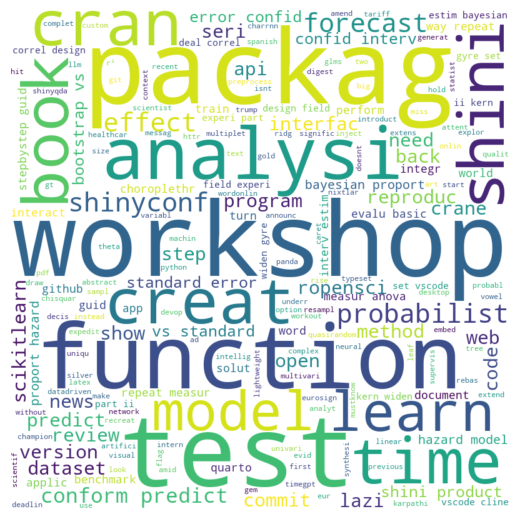

In [29]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt

titles_combined = ' '.join(cleaned_titles)
wordcloud = WordCloud(width=800,
                      height=800,
                      background_color='white',
                      min_font_size=10).generate(titles_combined)

plt.figure(figsize=(5, 5), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [30]:
from collections import Counter

Counter(titles_combined.split()).most_common(10)

[('workshop', 11),
 ('packag', 11),
 ('test', 10),
 ('shini', 10),
 ('predict', 9),
 ('model', 9),
 ('function', 8),
 ('analysi', 8),
 ('vs', 6),
 ('creat', 6)]

In [31]:
#COM SPACY

import spacy
nlp = spacy.load('en_core_web_sm')

def clean_text_with_spacy(text, stopwords=stopwords):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]
    tokens = [token.lower() for token in tokens if token not in stopwords]
    return ' '.join(tokens)

cleaned_titles_with_spacy = [clean_text_with_spacy(title) for title in tqdm(all_titles)]


100%|██████████| 200/200 [00:01<00:00, 193.24it/s]


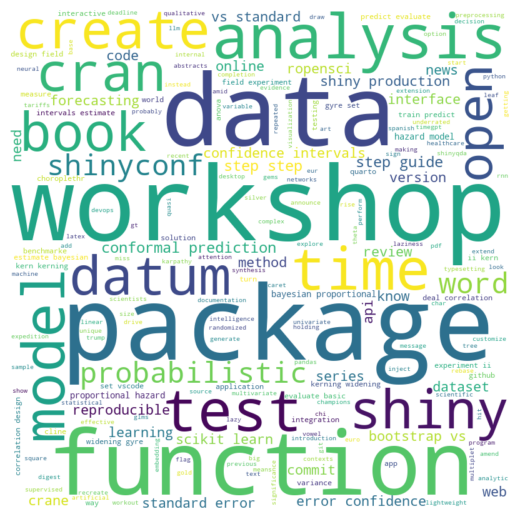

In [32]:
titles_combined = ' '.join(cleaned_titles_with_spacy)
wordcloud = WordCloud(width=800,
                      height=800,
                      background_color='white',
                      min_font_size=10).generate(titles_combined)

plt.figure(figsize=(5, 5), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()